# California Housing Dataset

Este conjunto de datos de viviendas de California proporciona una variedad de características socioeconómicas y geográficas para los distritos censales en California. Este conjunto de datos nos servirá para ver el uso de los *Árboles y Bosques Aleatorios para regresión* por la complejidad en los datos. En primer lugar haremos un análisis exploratorio de los datos, y terminaremos creando un modelo de regresión lineal simple para saber que tan bueno es este modelo de regresión sencillo y terminaremos creando los últimos algoritmos del video.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/sample_data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

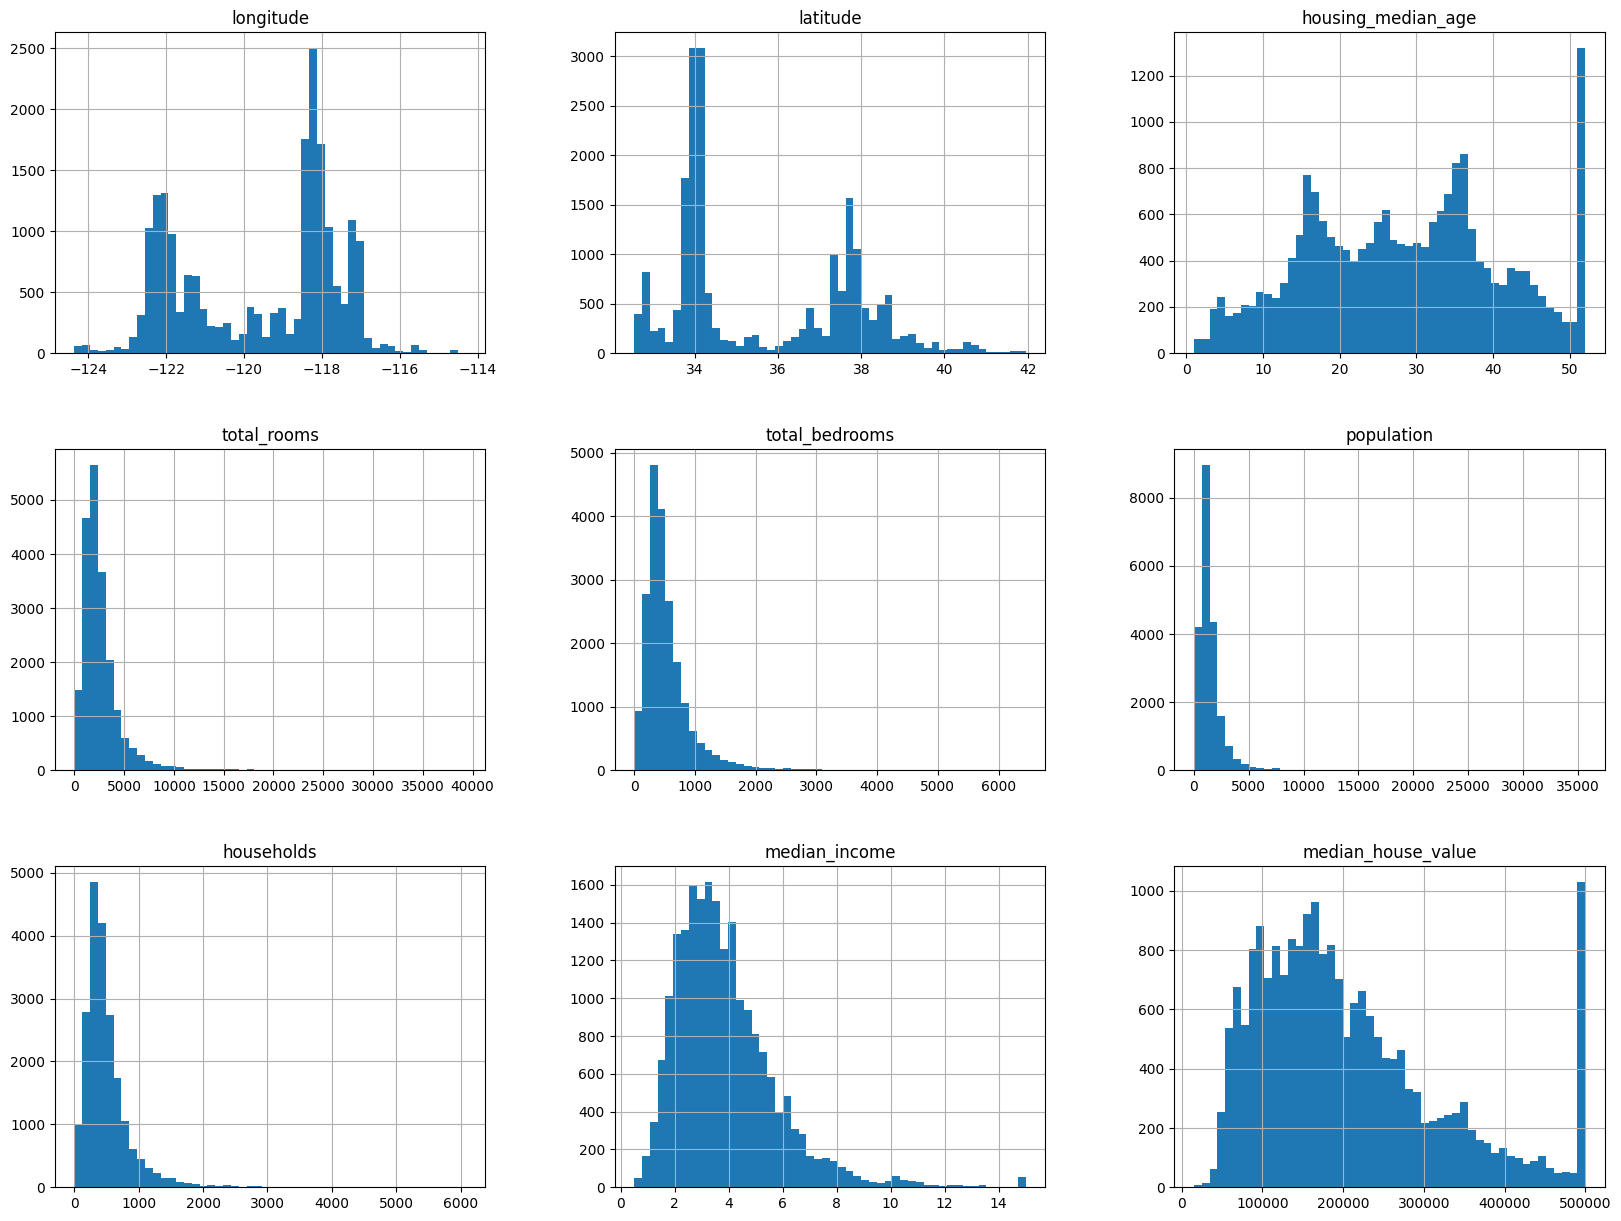

In [5]:
data.hist(bins=50, figsize=(20,15))

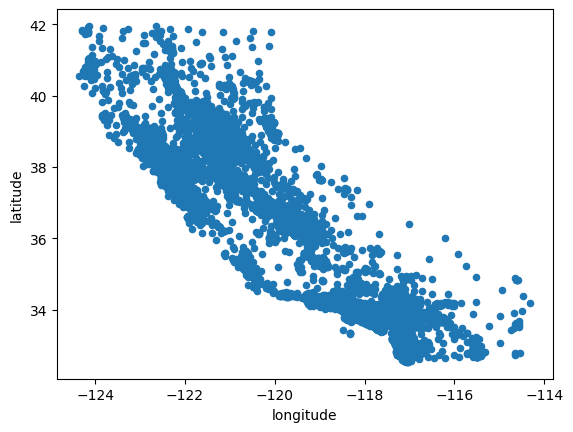

In [6]:
data.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

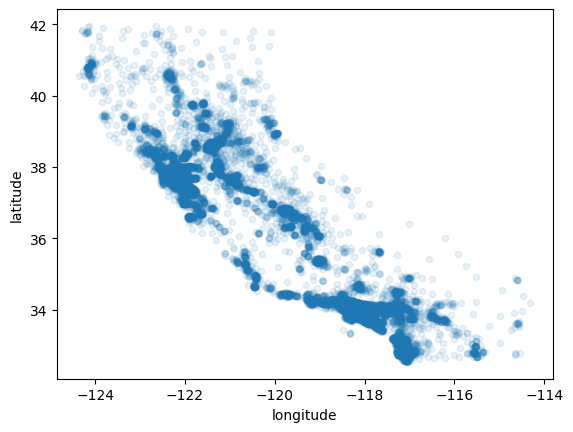

In [7]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

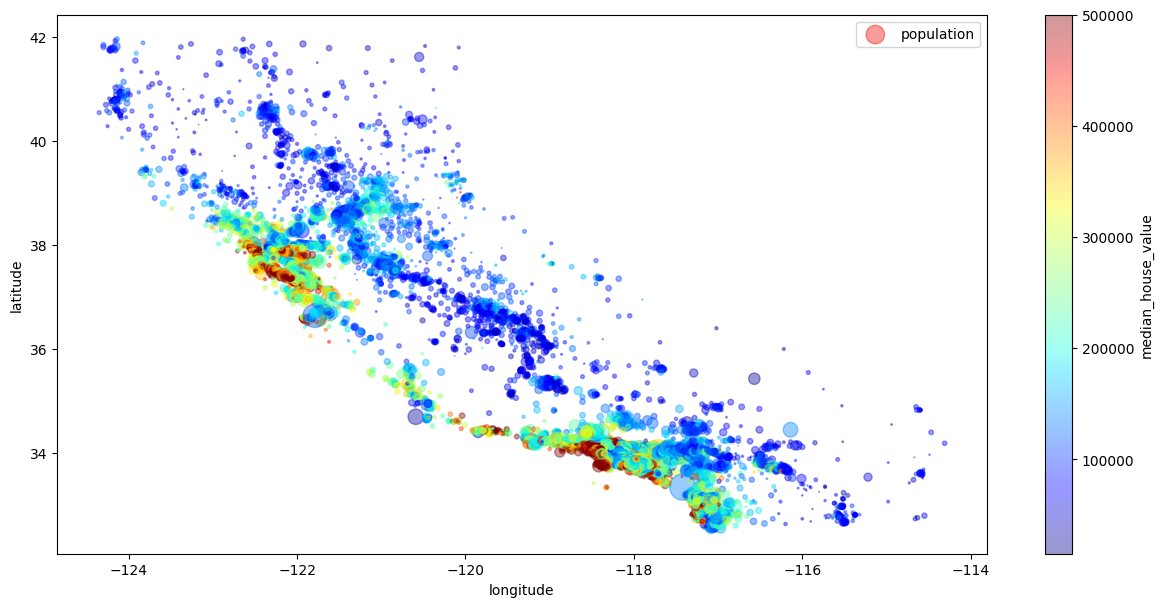

In [8]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
          s=data['population']/100, label='population', figsize=(15,7),
          c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

<ipython-input-9-50f254647ea7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

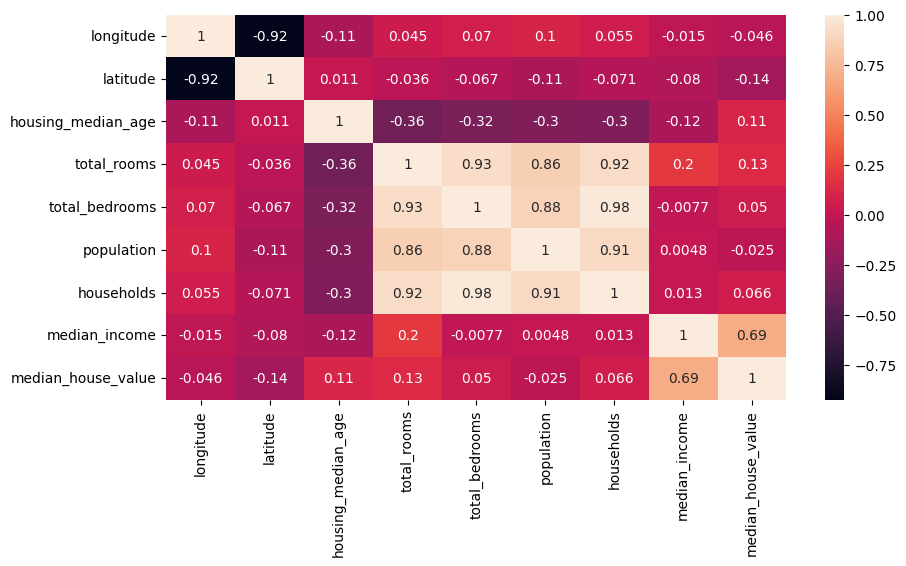

In [9]:
# Correlación
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

In [10]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-10-ebf3c9d18328>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Combinación de atributos

- `rooms_per_household`: Representa el número medio de habitaciones por hogar en una cierta área. Proporciona una medida de la densidad de habitaciones en una vivienda promedio en esa área.
- `bedrooms_per_room`: Indica la proporción de dormitorios con respecto al número total de habitaciones en una cierta área.
- `population_per_household`: Representa la densidad de población promedio por hogar en una cierta área.

In [11]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

In [12]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-12-ebf3c9d18328>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### Limpieza de datos y manejo de atributos categóricos

In [13]:
import numpy as np

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [15]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [17]:
# Manipulacion de los datos categóricos
from sklearn.preprocessing import OrdinalEncoder
data_ocean = data[['ocean_proximity']]
ordinal_encoder = OrdinalEncoder()
data_ocean_encoded = ordinal_encoder.fit_transform(data_ocean)

In [18]:
np.random.choice(data_ocean_encoded.ravel(), size=10)

array([3., 0., 3., 1., 1., 4., 1., 3., 1., 0.])

In [19]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_ocean)

In [20]:
data_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [21]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [22]:
encoded_df = pd.DataFrame(data_cat_1hot.toarray(), columns = cat_encoder.get_feature_names_out())
encoded_df.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


## Crear los algoritmos de Machine Learning

In [23]:
# Variables dependiente e independites
y = data['median_house_value'].values.reshape(-1,1)

In [24]:
X = data[[
    'median_income',
    'rooms_per_household',
    'total_rooms',
    'housing_median_age',
    'households'
]]

In [25]:
data1 = pd.concat([X, encoded_df], axis=1)
data1.columns

Index(['median_income', 'rooms_per_household', 'total_rooms',
       'housing_median_age', 'households', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [26]:
X = data1.values

### Regresión Lineal Múltiple

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
print(X_train.shape)
print(y_train.shape)

(16512, 10)
(16512, 1)


In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lin_reg.predict(X_test)

In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.613082907415132

### Escalar variables

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.6118662450268761

In [34]:
# Creación del modelo columna por columna
columnas = ['median_income', 'rooms_per_household','total_rooms','housing_median_age','households', 'latitude', 'longitude']
col_modelo = []
y = data['median_house_value'].values.reshape(-1,1)

for col in columnas:
  col_modelo.append(col)
  data1 = data[col_modelo]
  data1 = pd.concat([data1, encoded_df], axis=1)
  X = data1.values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  y_pred = lin_reg.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  print(col_modelo, r2)

['median_income'] 0.5690673517484984
['median_income', 'rooms_per_household'] 0.5735104980331784
['median_income', 'rooms_per_household', 'total_rooms'] 0.5801386812839652
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age'] 0.6061265717489386
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households'] 0.6101780270239433
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude'] 0.6075395805063497
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude', 'longitude'] 0.6192925354103984


## Árbol de regresión

Es un algoritmo de aprendizaje supervisadom se utiliza cuando enfrentamos problemas de regresión con conjuntos de datos grandes, con relaciones complejas o no lineales entre las variables independientes (*X*) y la variable dependiente (*y*).

El árbol aleatorio para regresión es adecuado cuando:

- **Datos no lineales**: Cuando la relación entre las variables predictoras y la variable de respuesta es no lineal.
- **Conjuntos de datos grandes y complejos**: Funciona bien en conjuntos de datos grandes y complejos con múltiples variables predictoras.
- **Cuando se quiere evitar el sobreajuste**: Los árboles aleatorios para regresión son menos propensos al sobreajuste que otros modelos de regresión.

![Keebola](https://assets-global.website-files.com/5e6f9b297ef3941db2593ba1/5f6314a3c5ba908f8f9a43a4_Screenshot%202020-09-17%20at%2009.47.26.png)

#### Ventajas y desventajas

**Ventajas**

1. **Modelo robusto**: Puede manejar datos no lineales y relaciones complejas.
2. **Resistencia al sobreajuste**: Reducción del sobreajuste al promediar múltiples árboles.
3. **Buena generalización**: Funciona bien en una variedad de conjuntos de datos sin requerir mucha configuración.

**Desventajas**

1. **Recursos computacionales**: Puede ser más intensivo en recursos computacionales debido a la construcción de múltiples árboles.
2. **Sensible a los valores atípicos**.
3. **Difícil interpretabilidad**: No hay interpretación de cada variable como por ejemplo en la regresión lineal.

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
columnas = ['median_income', 'rooms_per_household','total_rooms','housing_median_age','households', 'latitude', 'longitude']
col_modelo = []
y = data['median_house_value'].values.reshape(-1,1)

for col in columnas:
  col_modelo.append(col)
  data1 = data[col_modelo]
  data1 = pd.concat([data1, encoded_df], axis=1)
  X = data1.values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  tree_reg = DecisionTreeRegressor()
  tree_reg.fit(X_train, y_train)
  y_pred = tree_reg.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  print(col_modelo, r2)

['median_income'] 0.26370265279544025
['median_income', 'rooms_per_household'] 0.24299392596535652
['median_income', 'rooms_per_household', 'total_rooms'] 0.22408977708420674
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age'] 0.3912052644916819
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households'] 0.33678122938579425
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude'] 0.452864271358294
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude', 'longitude'] 0.6628922459182403


## Bosque Aleatorio

Es un algoritmo de aprendizaje supervisado de ensemble learning que ensambla multiples árboles de decisión para tareas de regresión. El bosque aleatorio para regresión es adecuado en situaciones similares a las del árbol aleatorio para regresión:

- **Datos no lineales**: Cuando la relación entre variables predictoras y la variable de respuesta no es lineal.
- **Conjuntos de datos grandes y complejos**: Funciona bien en conjuntos de datos grandes y complejos con múltiples variables predictoras.

![Random Forest Regressor](https://dphi-live.s3.amazonaws.com/media_uploads/image_2e1b9f9d0eed4aaf8f292818a69cd04d.png)

#### Ventajas y desventajas

**Ventajas**

1. **Buena generalización**: Funcioa bien en una variedad de conjuntos de datos sin requerir mucha configuración.
2. **Manejo de características**: Puede manejar conjuntos de datos con un gran número de características.

**Desventajas**

1. **Menos interpretable**: La interpretación del modelo puede ser más desafiante en comparación con modelos más simples.
2. **Recursos computacionales**: Puede ser más intensivo en recursos computacionales debido a la construcción de múltiples árboles.

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
columnas = ['median_income', 'rooms_per_household','total_rooms','housing_median_age','households', 'latitude', 'longitude']
col_modelo = []
y = data['median_house_value'].values

for col in columnas:
  col_modelo.append(col)
  data1 = data[col_modelo]
  data1 = pd.concat([data1, encoded_df], axis=1)
  X = data1.values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  forest_reg = RandomForestRegressor()
  forest_reg.fit(X_train, y_train)
  y_pred = forest_reg.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  print(col_modelo, r2)

['median_income'] 0.4438154575675798
['median_income', 'rooms_per_household'] 0.5495319275241328
['median_income', 'rooms_per_household', 'total_rooms'] 0.5996619796285579
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age'] 0.6376925304459231
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households'] 0.6521642987904783
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude'] 0.7186853831539031
['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude', 'longitude'] 0.8051440907800149
